# Historical emissions across subnets

On this notebook, you can find code to get information on the share of emissions subnets receive. 

In [92]:
import bittensor as bt
import torch
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
from substrateinterface import SubstrateInterface

In [93]:
subtensor = bt.subtensor('archive')
substrate = SubstrateInterface(url="wss://archive.chain.opentensor.ai:443/")

3054997


## Weekly data for all subnets

In [94]:
block = substrate.get_block()['header']['number']
print(block)
# get latest block
# essai sur 4 mois, avec 6000 blocks/j, 1semaine = 42000 blocks
blocks_per_week = 7200*7
blocks = range(block - blocks_per_week*8, block + blocks_per_week, blocks_per_week)
#jour block 2735000: 10 avril
# find block timestamp
today = datetime.today().date()
start_date = (today - relativedelta(weeks=8))
days_since_start = 0
print(block, blocks)

3054997 range(2651797, 3105397, 50400)


In [95]:
emissions_data_SN1to8 = {}
# emissions_data_SN9to16 = {}
# emissions_data_SN17to24 = {}
# emissions_data_SN25to32 = {}

for block in blocks:
    subnet_emissions_1 = {}
    # subnet_emissions_2 = {}
    # subnet_emissions_3 = {}
    # subnet_emissions_4 = {}
    date = (start_date + relativedelta(days=days_since_start)).strftime('%Y-%m-%d')
    days_since_start += 7
    print(block, date)

    for i in range(1, 9):
        emissions_1 = subtensor.get_emission_value_by_subnet(i, block)
        subnet_emissions_1[i]= float(emissions_1)
    emissions_data_SN1to8[date] = subnet_emissions_1

    """
    for i in range(9, 17):
        emissions_2 = subtensor.get_emission_value_by_subnet(i, block)
        subnet_emissions_2[i]= float(emissions_2)
    emissions_data_SN9to16[date] = subnet_emissions_2

    for i in range(17, 25):
        emissions_3 = subtensor.get_emission_value_by_subnet(i, block)
        subnet_emissions_3[i]= float(emissions_3)
    emissions_data_SN17to24[date] = subnet_emissions_3

    for i in range(25, 33):
        emissions_4 = subtensor.get_emission_value_by_subnet(i, block)
        subnet_emissions_4[i]= float(emissions_4)
    emissions_data_SN25to32[date] = subnet_emissions_4
    """

emissions_SN1to8 = pd.DataFrame(emissions_data_SN1to8).T
# emissions_SN9to16 = pd.DataFrame(emissions_data_SN9to16).T
# emissions_SN17to24 = pd.DataFrame(emissions_data_SN17to24).T
# emissions_data_SN25to32 = pd.DataFrame(emissions_data_SN25to32).T


2651797 2024-04-02
2702197 2024-04-09
2752597 2024-04-16
2802997 2024-04-23
2853397 2024-04-30
2903797 2024-05-07
2954197 2024-05-14
3004597 2024-05-21
3054997 2024-05-28


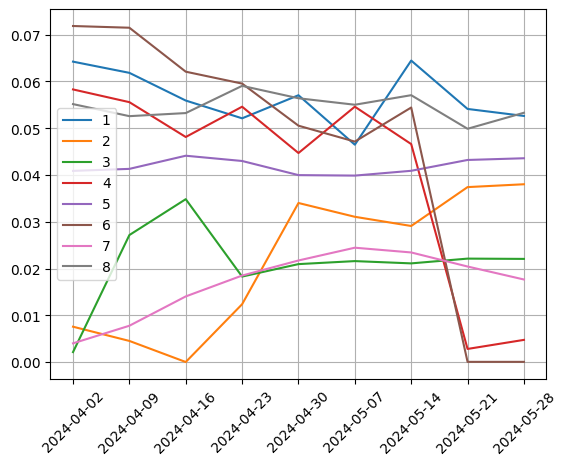

In [97]:
emissions_SN1to8.plot(kind='line')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Daily emissions data for one subnet

In [127]:
block = substrate.get_block()['header']['number']
print(block)

# blocks
blocks_per_day = 7200
period = 50
blocks = range(block - blocks_per_day*period, block + blocks_per_day, blocks_per_day)

# today date
today = datetime.today().date()
start_date = (today - relativedelta(days=period))
days_since_start = 0
print(blocks)

3055179
range(2695179, 3062379, 7200)


In [128]:
emissions_data = {}

for block in blocks:
    subnet_emissions_1 = {}

    date = (start_date + relativedelta(days=days_since_start)).strftime('%m-%d')
    days_since_start += 1
    print(block, date)

    emissions = float(subtensor.get_emission_value_by_subnet(2, block))
    emissions_data[date] = emissions

index = pd.date_range(start=start_date, periods=days_since_start, freq='D')
emissions_df = pd.DataFrame(emissions_data, index=index).T

2695179 2024-04-08
2702379 2024-04-09
2709579 2024-04-10
2716779 2024-04-11
2723979 2024-04-12
2731179 2024-04-13
2738379 2024-04-14
2745579 2024-04-15
2752779 2024-04-16
2759979 2024-04-17
2767179 2024-04-18
2774379 2024-04-19
2781579 2024-04-20
2788779 2024-04-21
2795979 2024-04-22
2803179 2024-04-23
2810379 2024-04-24
2817579 2024-04-25
2824779 2024-04-26
2831979 2024-04-27
2839179 2024-04-28
2846379 2024-04-29
2853579 2024-04-30
2860779 2024-05-01
2867979 2024-05-02
2875179 2024-05-03
2882379 2024-05-04
2889579 2024-05-05
2896779 2024-05-06
2903979 2024-05-07
2911179 2024-05-08
2918379 2024-05-09
2925579 2024-05-10
2932779 2024-05-11
2939979 2024-05-12
2947179 2024-05-13
2954379 2024-05-14
2961579 2024-05-15
2968779 2024-05-16
2975979 2024-05-17
2983179 2024-05-18
2990379 2024-05-19
2997579 2024-05-20
3004779 2024-05-21
3011979 2024-05-22
3019179 2024-05-23
3026379 2024-05-24
3033579 2024-05-25
3040779 2024-05-26
3047979 2024-05-27
3055179 2024-05-28


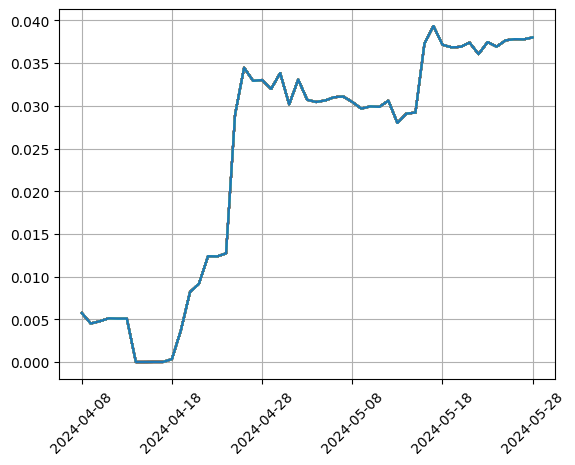

In [139]:
emissions_df.plot(kind='line')
plt.xticks(rotation=45)
plt.grid()
plt.legend().remove()
plt.show()